In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import keras
import numpy as np

from keras.datasets import mnist
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras import backend as K

os.environ["CUDA_VISIBLE_DEVICES"]="2"

K.tensorflow_backend._get_available_gpus()

/home/jhooge/miniconda3/envs/deeplearning/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

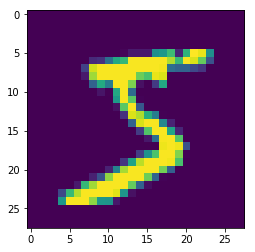

In [5]:
imgplot = plt.imshow(train_images[0,:,:])

In [6]:
train_images[0,:,:].flatten()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [7]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [8]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [9]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [10]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [11]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
train_labels[0,:] ## digit 5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
history = network.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.2572 - acc: 0.9249
Epoch 2/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.1030 - acc: 0.9698
Epoch 3/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0674 - acc: 0.9795
Epoch 4/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0491 - acc: 0.9855
Epoch 5/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0376 - acc: 0.9888
Epoch 6/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0286 - acc: 0.9914
Epoch 7/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0215 - acc: 0.9935
Epoch 8/10
60000/60000 [==============================] - 1s 25us/step - loss: 0.0168 - acc: 0.9954
Epoch 9/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0130 - acc: 0.9963
Epoch 10/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0096 - acc: 0.9974

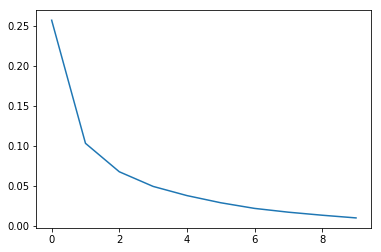

In [17]:
train_performance = history.history
plt.plot(train_performance["loss"])

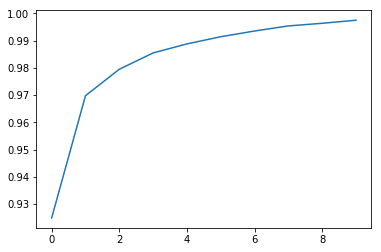

In [18]:
plt.plot(train_performance["acc"])

In [19]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 42us/step


In [22]:
train_loss, train_acc = train_performance["loss"][-1], train_performance["acc"][-1],
test_loss, test_acc

print("Train/Test Loss: %.4f/%.4f" % (train_loss, test_loss))
print("Train/Test Acc: %.4f/%.4f" % (train_acc, test_acc))

Train/Test Loss: 0.0096/0.0704
Train/Test Acc: 0.9974/0.9833


In [24]:
from keras.models import Sequential
from keras.layers import Dense

def build_fc_model(n_input, n_classes, n_hidden_layers, n_hidden_units, model_name):
    assert(len(n_hidden_units) == n_hidden_layers)
    model = Sequential()
    model.add(Dense(n_input, activation="relu", input_shape=(n_input, )))
    
    for layer in range(n_hidden_layers):
        n_units = n_hidden_units[layer]
        model.add(Dense(n_units, activation="relu"))
        
    model.add(Dense(n_classes, activation="softmax"))
    return(model)

In [25]:
model_1 = build_fc_model(28*28, 10, 1, [32], "one_layer")
model_2 = build_fc_model(28*28, 10, 2, [32, 32], "two_layer")
model_3 = build_fc_model(28*28, 10, 3, [32, 16, 32], "three_layer")

In [26]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 640,890
Trainable params: 640,890
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_8 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
Total params: 641,946
Trainable params: 641,946
Non-trainable params: 0
_________________________________________________________________


In [28]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_12 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_13 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_14 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                330       
Total params: 641,962
Trainable params: 641,962
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_1.compile("rmsprop", loss="categorical_crossentropy")
model_1.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.2467
Epoch 2/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.0919
Epoch 3/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0598
Epoch 4/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0420
Epoch 5/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0309
Epoch 6/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0227
Epoch 7/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0185
Epoch 8/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0140
Epoch 9/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0115
Epoch 10/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0094


In [38]:
model_2.compile("rmsprop", loss="categorical_crossentropy")
model_2.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.2793
Epoch 2/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0995
Epoch 3/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0664
Epoch 4/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0462
Epoch 5/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0361
Epoch 6/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0265
Epoch 7/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0218
Epoch 8/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0170
Epoch 9/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0138
Epoch 10/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0115


In [39]:
model_3.compile("rmsprop", loss="categorical_crossentropy")
model_3.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.3310
Epoch 2/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.1121
Epoch 3/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0753
Epoch 4/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0552
Epoch 5/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0410
Epoch 6/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0331
Epoch 7/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0251
Epoch 8/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0203
Epoch 9/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0166
Epoch 10/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0142


In [42]:
predictions = model_3.predict(x= test_images, batch_size=128)
predictions[0:5,]

array([[6.11807307e-18, 7.89430506e-14, 4.32591046e-11, 3.76364901e-13,
        4.25859512e-17, 2.80093635e-21, 3.91689584e-22, 1.00000000e+00,
        4.81450685e-20, 1.20782648e-10],
       [2.40876468e-19, 1.22010505e-14, 1.00000000e+00, 3.13497329e-14,
        1.64578323e-19, 4.00299679e-22, 6.38955858e-20, 3.13548809e-21,
        5.73956369e-11, 7.38429596e-22],
       [9.11094117e-13, 9.99981284e-01, 2.24927206e-07, 5.16653109e-10,
        2.73368551e-06, 1.26900321e-08, 1.28876101e-08, 2.87079911e-06,
        1.28424308e-05, 5.05111970e-08],
       [1.00000000e+00, 3.34748912e-14, 6.64551747e-10, 1.76182298e-11,
        7.08767212e-11, 1.83834436e-12, 1.92177096e-09, 7.59797503e-11,
        3.66291334e-13, 4.06448954e-08],
       [1.12557160e-11, 2.33815811e-09, 1.19815795e-07, 7.63980823e-10,
        9.99983788e-01, 1.59685980e-12, 1.19911192e-10, 1.07675557e-08,
        5.22748778e-09, 1.60367217e-05]], dtype=float32)